In [1]:
import pandas as pd
import numpy as np

In [2]:
lst = ['33333', '33335', '33353', '33355', '33533', '33535', '33553', '33555', '35333', '35335', '35353', '35355', '35533', '35535', '35553', '35555',
      '53333', '53335', '53353', '53355', '53533', '53535', '53553', '53555', '55333', '55335', '55353', '55355', '55533', '55535', '55553', '55555']
data_parameter_dict = {}
for num in lst:
    file_name = './td/td_'+num+'.csv'
    data_parameter_dict[file_name] = num

In [3]:
ml_datas = []
for file_name in data_parameter_dict:
    ml_datas.append(pd.read_csv(file_name, encoding='cp949'))

In [4]:
# train, test 데이터 분할 함수, test size = 0.2로 분할
def train_test_split_customized(ml_data):
    length = len(ml_data)
    idx = int(length*0.8)
    train = ml_data.iloc[:-idx, :]
    test = ml_data.iloc[-idx:, :]
    X_train = train.iloc[:, 3:-1].astype('float64')
    y_train = train['Result'].astype('float64')
    X_test = test.iloc[:, 3:-1].astype('float64')
    y_test = test['Result'].astype('float64')
    return X_train, y_train, X_test, y_test

# n개의 데이터를 test 데이터로 활용. n_shift: 지난 n_shift개 경기를 제외하고 함수를 적용
def train_test_split_customized_last_n(ml_data, n, n_shift=0):
    train = ml_data.iloc[:-(n+n_shift), :]
    if n_shift != 0:
        test = ml_data.iloc[-(n+n_shift):-n_shift, :]
    else:
        test = ml_data.iloc[-(n+n_shift):, :]
    X_train = train.iloc[:, 3:-1].astype('float64')
    y_train = train['Result'].astype('float64')
    X_test = test.iloc[:, 3:-1].astype('float64')
    y_test = test['Result'].astype('float64')
    return X_train, y_train, X_test, y_test

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# 결정트리 머신러닝 함수
def DTC_ml(X_train, y_train, X_test, y_test):
    dt_clf = DecisionTreeClassifier()
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    #print('결정 트리 예측 정확도: {0:.2f}%'.format(accuracy*100))
    return dt_clf, pred, accuracy

# GridSearchCV 머신러닝 함수
def GSCV_ml(X_train, y_train, X_test, y_test, dt_clf):
    params = {'max_depth':[2, 4, 8, 12, 16, 20, 24, 28, 32], 'min_samples_split':[4, 6, 8, 10, 12, 14, 16]}

    grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
    grid_cv.fit(X_train, y_train)
    print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
    print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
    
    best_df_clf = grid_cv.best_estimator_
    pred1 = best_df_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))
    return grid_cv

In [6]:
def evaluate_datasets(iter_num):

    evaluation_list = [0]*32
    for i in range(iter_num):
        accuracy_list = []
        for ml_data in ml_datas:
            X_train, y_train, X_test, y_test = train_test_split_customized(ml_data)
            dt_clf, pred_dt, accuracy = DTC_ml(X_train, y_train, X_test, y_test)
            accuracy_list.append(accuracy)
        sorted_accuracy_list = sorted(accuracy_list)
        for k, accuracy in enumerate(accuracy_list):
            for n, accuracy_sort in enumerate(sorted_accuracy_list):
                if accuracy_sort == accuracy:
                    if n != 0:
                        if accuracy_sort == sorted_accuracy_list[n-1]:
                            continue
                    evaluation_list[k] += n
    return evaluation_list

evaluation_list = evaluate_datasets(100)

[(2676, '55553'), (2551, '35553'), (2516, '55353'), (2443, '35353'), (2188, '33553')]


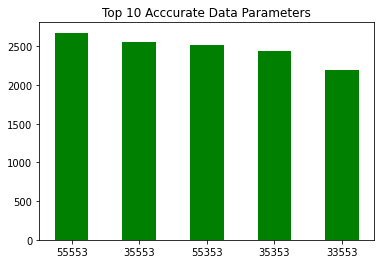

In [31]:
import matplotlib.pyplot as plt

for evaluation in evaluation_list:
    evaluation *= 0.01

eval_list = []
for pair in zip(evaluation_list, lst):
    eval_list.append(pair)
    
eval_list.sort(reverse=True)

param_names = []
param_accuracies = []
for x, y in eval_list[:5]:
    param_names.append(y)
    param_accuracies.append(x)
print(eval_list[:5])
plt.bar(param_names, param_accuracies, color='g', width=0.5)
plt.title('Top 10 Acccurate Data Parameters')
plt.show()


GBM 정확도:52.48%


In [34]:
ml_data

,Season,HomeTeam,AwayTeam,FTG,FTR,HTG,HTR,S,ST,C,F,Y,Rn,R1,LSR,CSR,LHAP,LMP,LMHAP,Result
0,2001-02,Charlton,Everton,0,3,1.0,5,-4.0,2.0,7.0,-26.0,-9.0,-1.0,0.0,7,0,4,0,3,0
1,2001-02,Derby,Blackburn,-8,-3,0.0,0,-16.0,-18.0,-8.0,-1.0,-3.0,1.0,0.0,4,0,1,0,0,3
2,2001-02,Leeds,Southampton,8,5,5.0,3,15.0,18.0,11.0,7.0,4.0,1.0,0.0,6,0,11,0,3,3
3,2001-02,Leicester,Bolton,-1,-1,-2.0,2,7.0,7.0,-5.0,17.0,9.0,0.0,0.0,8,0,3,0,0,0
4,2001-02,Liverpool,West Ham,8,10,1.0,6,1.0,3.0,-7.0,-9.0,-7.0,0.0,0.0,12,0,9,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,2021-22,Brighton,Arsenal,-11,-3,-2.0,-2,-21.0,-31.0,-4.0,1.0,5.0,0.0,0.0,-8,5,-3,0,3,1
7666,2021-22,Crystal Palace,Leicester,-4,-3,-1.0,1,13.0,-7.0,-5.0,-2.0,-7.0,0.0,0.0,-9,-1,-1,-6,3,1
7667,2021-22,Tottenham,Aston Villa,3,6,2.0,8,43.0,21.0,25.0,47.0,9.0,1.0,0.0,4,-4,9,9,3,3
7668,2021-22,West Ham,Brentford,9,8,3.0,8,73.0,25.0,28.0,41.0,4.0,1.0,0.0,15,3,7,0,0,0


In [38]:
params = {
    'n_estimators':[100, 300, 500],
    'learning_rate':[0.01, 0.03, 0.05]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.2f}%'.format(grid_cv.best_score_*100))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 12.4min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.01, 'n_estimators': 300}
최고 예측 정확도:51.96%


In [67]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도:{0:.4f}'.format(gb_accuracy))

GBM 정확도:0.5267
[0 3 3 0 3 3 3 0 0 0 3 3 3 3 0 3 3 3 0 0 3 3 3 3 3 0 3 3 0 3 3 0 3 0 0 0 0
 3 3 0 3 3 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 3 3 3 0 1 3 3 0 3 0 3
 3 3 3 3 0 0 3 0 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3]


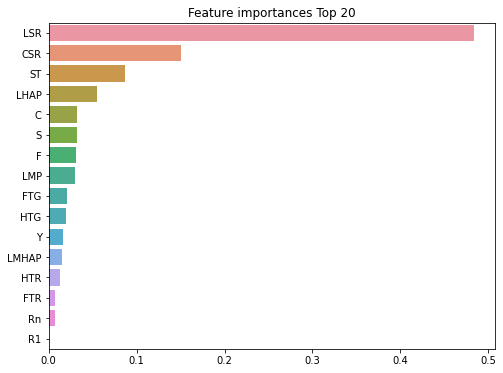

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

best_df_clf = grid_cv.best_estimator_

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances_values = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances_values.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [42]:
import joblib

joblib(grid_cv.best_estimator_, 'EPL_prediction.pkl')

TypeError: 'module' object is not callable

In [57]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(100):
    kn_clf = KNeighborsClassifier(n_neighbors=(i+1)*20)
    kn_clf.fit(X_train, y_train)
    pred = kn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print((i+1)*20, '파라미터 정확도:', accuracy)

20 파라미터 정확도: 0.48435462842242505
40 파라미터 정확도: 0.5026075619295959
60 파라미터 정확도: 0.516297262059974
80 파라미터 정확도: 0.5130378096479792
100 파라미터 정확도: 0.5130378096479792
120 파라미터 정확도: 0.5084745762711864
140 파라미터 정확도: 0.5097783572359843
160 파라미터 정확도: 0.5123859191655802
180 파라미터 정확도: 0.5091264667535854
200 파라미터 정확도: 0.5130378096479792
220 파라미터 정확도: 0.516297262059974
240 파라미터 정확도: 0.5136897001303781
260 파라미터 정확도: 0.515645371577575
280 파라미터 정확도: 0.515645371577575
300 파라미터 정확도: 0.5228161668839635
320 파라미터 정확도: 0.5241199478487614
340 파라미터 정확도: 0.5221642764015645
360 파라미터 정확도: 0.5228161668839635
380 파라미터 정확도: 0.5228161668839635
400 파라미터 정확도: 0.5241199478487614
420 파라미터 정확도: 0.5228161668839635
440 파라미터 정확도: 0.5260756192959583
460 파라미터 정확도: 0.5273794002607562
480 파라미터 정확도: 0.5254237288135594
500 파라미터 정확도: 0.5234680573663625
520 파라미터 정확도: 0.5254237288135594
540 파라미터 정확도: 0.5241199478487614
560 파라미터 정확도: 0.5215123859191656
580 파라미터 정확도: 0.5208604954367666
600 파라미터 정확도: 0.5267275097783573
620 파라미터 정확도: 0.5

In [66]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(C=100000,solver='newton-cg')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(pred[0:100])

0.530638852672751
[0 3 3 0 3 3 3 0 0 0 3 3 3 3 0 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 0 0
 0 3 0 3 3 0 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 0 0 0 0 3 3 3 0 3 3 3 0 3 0 3
 3 3 3 3 0 0 3 0 3 0 3 3 3 3 0 3 3 3 3 3 0 3 3 0 3 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


    train = ml_data.iloc[:-idx, :]
    test = ml_data.iloc[-idx:, :]
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)